#An Exploratory Data Analysis

####A voyage through evaluating preferential factors in cinema using public IMDB data.
####This notebook has been adapted from [Chris Beaumont's](http://chrisbeaumont.org/) ["Rubric for Data Wrangling and Exploration"](http://nbviewer.ipython.org/github/cs109/content/blob/master/lec_04_wrangling.ipynb)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

####Once you have done a git pull the dataset 'imdb_top_10000.txt' will be in Datasets folder under GADS-22-NYC
####Try and read the data in directly using the pandas built in read_csv method - hint you will need to set the delimiter argument to 'tab', i.e. \t
####If you hadn't been told to tab delimit you might need to inspect the data file using a text editor to discover the delimitation between data fields

In [3]:
data = pd.read_csv('/Users/mrgh/GADS-22-NYC/Datasets/imdb_top_10000.txt', header=None, delimiter='\t')

####Two good initial starting places to considering the data are pd built in functions 'head' and 'describe'

##Questions:
 1. How many columns are there?
 2. How many rows are there?
 3. What do you notice about the column names?
 4. How many of the columns are numeric?

In [4]:
data.head()

,0,1,2,3,4,5,6
0,tt0111161,The Shawshank Redemption (1994),1994,9.2,619479,142 mins.,Crime|Drama
1,tt0110912,Pulp Fiction (1994),1994,9.0,490065,154 mins.,Crime|Thriller
2,tt0137523,Fight Club (1999),1999,8.8,458173,139 mins.,Drama|Mystery|Thriller
3,tt0133093,The Matrix (1999),1999,8.7,448114,136 mins.,Action|Adventure|Sci-Fi
4,tt1375666,Inception (2010),2010,8.9,385149,148 mins.,Action|Adventure|Sci-Fi|Thriller


In [5]:
data.describe()

,2,3,4
count,10000.000000,10000.000000,10000.000000
mean,1993.472800,6.386070,16604.012800
std,14.829924,1.189933,34563.459698
min,1950.000000,1.500000,1356.000000
25%,1986.000000,5.700000,2333.750000
50%,1998.000000,6.600000,4980.500000
75%,2005.000000,7.200000,15277.750000
max,2011.000000,9.200000,619479.000000


####Let's sort out the column headings to be a bit more informative
####print the column names
####Propose a list of new names
####Assign the new names to the columns
####Confirm that it's all hunky dorey

In [6]:
print data.columns
print "\n\n"
#or
for column_name in data.columns:
    print column_name

Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64')



0
1
2
3
4
5
6


In [7]:
new_column_names = ['imdbID', 'Title', 'Year', 'Score', 'Votes', 'Runtime', 'Genres']

In [8]:
data.columns = new_column_names

In [9]:
data.head()

,imdbID,Title,Year,Score,Votes,Runtime,Genres
0,tt0111161,The Shawshank Redemption (1994),1994,9.2,619479,142 mins.,Crime|Drama
1,tt0110912,Pulp Fiction (1994),1994,9.0,490065,154 mins.,Crime|Thriller
2,tt0137523,Fight Club (1999),1999,8.8,458173,139 mins.,Drama|Mystery|Thriller
3,tt0133093,The Matrix (1999),1999,8.7,448114,136 mins.,Action|Adventure|Sci-Fi
4,tt1375666,Inception (2010),2010,8.9,385149,148 mins.,Action|Adventure|Sci-Fi|Thriller


####What data types do we actually have in the data frame?

In [10]:
for column_name in data.columns:
    print column_name, ":", type(data[column_name][0])

imdbID : <type 'str'>
Title : <type 'str'>
Year : <type 'numpy.int64'>
Score : <type 'numpy.float64'>
Votes : <type 'numpy.int64'>
Runtime : <type 'str'>
Genres : <type 'str'>


####or

In [11]:
data.dtypes

imdbID      object
Title       object
Year         int64
Score      float64
Votes        int64
Runtime     object
Genres      object
dtype: object

####Year is an integer, Score is a float, Votes is an integer
####Runtime is a string and not terribly useful as such
####Genres is also unhelpful having multiple genres listed together in a string
####Let's fix Runtime and Genres
####The year in the Title column is also superfluous and needs to be removed

###Fixing the title
####I always explore my approach before actually trying it!
####THIS IS DATA MUNGING AND IS WHERE A LOT OF DATA SCIENTISTS SPEND A LOT OF TIME!!!

In [12]:
#Just separate out the series from the data frame
title = data['Title']
#See what each title potentially contains
print title[0]
#A string split should work
#This is a built in function that will split the string according to a pattern match
#Here the pattern to match is 'space opening left bracket' or ' ('
print title[0].split(' (')
print title[0].split(' (')[0]

The Shawshank Redemption (1994)
['The Shawshank Redemption', '1994)']
The Shawshank Redemption


####Python has a powerful feature called a List Comprehension, which can often replace loops and provides for very compact code

In [13]:
data['Title'] = [title.split(' (')[0] for title in data['Title']]

####We can't check that all the titles have been processed perfectly, but we can get an idea that the code above has done it's job


In [34]:
data['Title'][0:25]

0                           The Shawshank Redemption
1                                       Pulp Fiction
2                                         Fight Club
3                                         The Matrix
4                                          Inception
5                                       Forrest Gump
6                                    American Beauty
7                                             Avatar
8                                   Schindler's List
9     Star Wars: Episode V - The Empire Strikes Back
10                                     Batman Begins
11                                The Usual Suspects
12                          The Silence of the Lambs
13                                           Titanic
14                                        Braveheart
15                                   The Sixth Sense
16                                 Kill Bill: Vol. 1
17                                        Goodfellas
18                                            

In [35]:
data['Title'][-25:]

9975             Birdemic: Shock and Terror
9976    What Becomes of the Broken Hearted?
9977                      Back to the Beach
9978                            Hello Again
9979                       Major Movie Star
9980                     The Touch of Satan
9981                              Don McKay
9982                             Brainstorm
9983            Sex Lives of the Potato Men
9984                                 Lawman
9985                     The Dunwich Horror
9986                         I Live in Fear
9987                     The Long Walk Home
9988                                Evil Ed
9989                            Another You
9990                             Zerophilia
9991           The Merchant of Four Seasons
9992                              Stateside
9993                           Scarlet Diva
9994                                 Aprile
9995                                Meduzot
9996                         Daltry Calhoun
9997                 The Quiller

#Challenge
1. Taking a similar approach fix the runtime column

In [14]:
rt = data['Runtime']
print rt[0]
print rt[0].split(' m')

142 mins.
['142', 'ins.']


In [15]:
data['Runtime'] = [rt.split(' m')[0] for rt in data['Runtime']]

In [16]:
data['Runtime'][0:25]

0     142
1     154
2     139
3     136
4     148
5     142
6     122
7     162
8     195
9     124
10    140
11    106
12    118
13    194
14    177
15    107
16    111
17    146
18    117
19    130
20     99
21    110
22    189
23    153
24     98
Name: Runtime, dtype: object

####But we're not done with Runtime
####Firstly, because you have stripped out mins DO NOT forget what the units for the column are
####What is the type of data['Runtime']

In [39]:
#This is not entirely necessary
#I will recount the tumor story!!!
new_column_names = ['imdbID', 'Title', 'Year', 'Score', 'Votes', 'Runtime_in_mins', 'Genres']
data.columns = new_column_names

In [17]:
data.head()

,imdbID,Title,Year,Score,Votes,Runtime,Genres
0,tt0111161,The Shawshank Redemption,1994,9.2,619479,142,Crime|Drama
1,tt0110912,Pulp Fiction,1994,9.0,490065,154,Crime|Thriller
2,tt0137523,Fight Club,1999,8.8,458173,139,Drama|Mystery|Thriller
3,tt0133093,The Matrix,1999,8.7,448114,136,Action|Adventure|Sci-Fi
4,tt1375666,Inception,2010,8.9,385149,148,Action|Adventure|Sci-Fi|Thriller


In [18]:
data.dtypes

imdbID      object
Title       object
Year         int64
Score      float64
Votes        int64
Runtime     object
Genres      object
dtype: object

####We now want to convert the Runtime data column to an integer

In [20]:
data['Runtime'] = data['Runtime'].astype(int)

####Check the result

In [21]:
data.dtypes

imdbID      object
Title       object
Year         int64
Score      float64
Votes        int64
Runtime      int64
Genres      object
dtype: object

In [32]:
for column_name in data.columns:
    print column_name, ":", type(data[column_name][0])

imdbID : <type 'str'>
Title : <type 'str'>
Year : <type 'numpy.int64'>
Score : <type 'numpy.float64'>
Votes : <type 'numpy.int64'>
Runtime : <type 'numpy.int64'>
Genres : <type 'str'>


####This could have been more easily achieved by using a cast in the list comprehension
####data['Runtime'] = [float(rt.split(' m')[0]) for rt in data['Runtime']]

#Question:
1. What do you think might be the best way to alter "Genres"?
####Let's prototype again

In [33]:
gen = data['Genres']
print gen[3]

Action|Adventure|Sci-Fi


####It would be helpful to know how many genres are listed in the database, and what they are

In [34]:
genre_list = []
for genre in data['Genres']:
    #print genre
    individual_genres = genre.split('|')
    #print individual_genres
    for a_genre in individual_genres:
        #print a_genre
        if a_genre not in genre_list:
            #print a_genre
            genre_list.append(a_genre)

print genre_list

['Crime', 'Drama', 'Thriller', 'Mystery', 'Action', 'Adventure', 'Sci-Fi', 'Comedy', 'Romance', 'Fantasy', 'Biography', 'History', 'War', 'Family', 'Animation', 'Musical', 'Horror', 'Western', 'Sport', 'Music', 'Film-Noir', 'Adult', 'News', 'Reality-TV']


####What did you notice about the above code?

In [25]:
for g in data['Genres']:
    #print type(g)
    if type(g) is float:
        print "found type float in genre ", g

found type float in genre  nan


#Question:
####What did I neglect to do at the start of the munge??

In [35]:
#na's would be one of the first things you would address after reading in a new dataset
data = data.dropna()
data_dna = data.copy()

#Question:
1. What is the difference between a 'view' and a 'copy'

In [36]:
data_dna.describe()

,Year,Score,Votes,Runtime
count,9999.000000,9999.000000,9999.000000,9999.000000
mean,1993.471447,6.385989,16605.462946,103.580358
std,14.830049,1.189965,34564.883945,26.629310
min,1950.000000,1.500000,1356.000000,0.000000
25%,1986.000000,5.700000,2334.500000,93.000000
50%,1998.000000,6.600000,4981.000000,102.000000
75%,2005.000000,7.200000,15278.500000,115.000000
max,2011.000000,9.200000,619479.000000,450.000000


In [37]:
data_dna.dtypes

imdbID      object
Title       object
Year         int64
Score      float64
Votes        int64
Runtime      int64
Genres      object
dtype: object

####Now try and create the list of genres

In [38]:
genre_list = []
for genre in data_dna['Genres']:
    individual_genres = genre.split('|')
    for a_genre in individual_genres:
        if a_genre not in genre_list:
            genre_list.append(a_genre)

print sorted(genre_list)

['Action', 'Adult', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Reality-TV', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']


####Python has a built in sets
####Just like list comprehension you can do set comprehension
####So better:

In [39]:
genre_set = set()
for genre in data_dna['Genres']:
    genre_set.update(a_genre for a_genre in genre.split('|'))
    
genre_set=sorted(genre_set)
print genre_set

['Action', 'Adult', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Reality-TV', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']


####This is what we don't want to do:

|Genre 1|Genre 2|Genre 3|
|-------|-------|-------|
|Action|--|--|
|--|Adult|--|

####instead:

In [40]:
for g in genre_set:
    data_dna[g] = [g in movie_type.split('|') for movie_type in data_dna['Genres']]

#Exercise:
1. Unpick the list comprehension above and be sure you understand what is happening
2. Re-write the code using loops

In [54]:
for g in genre_set:
    mask = []
    for gen_list in data_dna['Genres']:
        mask.append(int(g in gen_list.split('|')))
    data_dna[g]=mask 

In [41]:
data_dna.head()

,imdbID,Title,Year,Score,Votes,Runtime,Genres,Action,Adult,Adventure,...,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western
0,tt0111161,The Shawshank Redemption,1994,9.2,619479,142,Crime|Drama,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,tt0110912,Pulp Fiction,1994,9.0,490065,154,Crime|Thriller,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,tt0137523,Fight Club,1999,8.8,458173,139,Drama|Mystery|Thriller,False,False,False,...,False,True,False,False,False,False,False,True,False,False
3,tt0133093,The Matrix,1999,8.7,448114,136,Action|Adventure|Sci-Fi,True,False,True,...,False,False,False,False,False,True,False,False,False,False
4,tt1375666,Inception,2010,8.9,385149,148,Action|Adventure|Sci-Fi|Thriller,True,False,True,...,False,False,False,False,False,True,False,True,False,False


In [56]:
data_dna.describe()

,Year,Score,Votes,Runtime_in_mins,Action,Adult,Adventure,Animation,Biography,Comedy,...,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western
count,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,...,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000
mean,1993.471447,6.385989,16605.462946,103.580358,0.189119,0.000900,0.131313,0.031403,0.039404,0.392239,...,0.026003,0.100910,0.000100,0.000100,0.244124,0.089709,0.028803,0.283228,0.051205,0.023502
std,14.830049,1.189965,34564.883945,26.629310,0.391623,0.029989,0.337759,0.174413,0.194564,0.488274,...,0.159151,0.301225,0.010001,0.010001,0.429588,0.285779,0.167260,0.450589,0.220427,0.151500
min,1950.000000,1.500000,1356.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1986.000000,5.700000,2334.500000,93.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1998.000000,6.600000,4981.000000,102.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2005.000000,7.200000,15278.500000,115.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,2011.000000,9.200000,619479.000000,450.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#Question:
1. How does python interpret True and False?

In [57]:
data_dna.dtypes

imdbID              object
Title               object
Year                 int64
Score              float64
Votes                int64
Runtime_in_mins      int64
Genres              object
Action               int64
Adult                int64
Adventure            int64
Animation            int64
Biography            int64
Comedy               int64
Crime                int64
Drama                int64
Family               int64
Fantasy              int64
Film-Noir            int64
History              int64
Horror               int64
Music                int64
Musical              int64
Mystery              int64
News                 int64
Reality-TV           int64
Romance              int64
Sci-Fi               int64
Sport                int64
Thriller             int64
War                  int64
Western              int64
dtype: object

In [58]:
data_dna[['Score', 'Runtime_in_mins', 'Year', 'Votes']].describe()

,Score,Runtime_in_mins,Year,Votes
count,9999.000000,9999.000000,9999.000000,9999.000000
mean,6.385989,103.580358,1993.471447,16605.462946
std,1.189965,26.629310,14.830049,34564.883945
min,1.500000,0.000000,1950.000000,1356.000000
25%,5.700000,93.000000,1986.000000,2334.500000
50%,6.600000,102.000000,1998.000000,4981.000000
75%,7.200000,115.000000,2005.000000,15278.500000
max,9.200000,450.000000,2011.000000,619479.000000


#Question:
1. What else do we have to address?

####There are some movies that have 0 min runtimes
####Let's investigate and address

In [42]:
number_zero_mins = len(data_dna['Runtime'][data_dna['Runtime']==0])

In [43]:
print number_zero_mins

282


####This is pretty awkward notation
####Dot notation is less so

In [44]:
number_zero_mins = len(data_dna.Runtime[data_dna.Runtime==0])

In [45]:
print number_zero_mins

282


####You might choose to remove these movies from the dataset depending on what you are trying to discover
####Another approach is to keep the records in the dataset and flag these entries as 'NAN's or Not a Number

In [46]:
mask = data_dna.Runtime==0

In [53]:
print mask

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
...
9985    False
9986    False
9987    False
9988    False
9989    False
9990    False
9991    False
9992    False
9993    False
9994    False
9995    False
9996    False
9997    False
9998    False
9999    False
Name: Runtime, Length: 9999, dtype: bool


In [49]:
data_dna.Runtime[mask] = np.nan

/Users/mrgh/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [51]:
data_dna[['Score', 'Runtime', 'Year', 'Votes']].describe()

,Score,Runtime,Year,Votes
count,9999.000000,9717.000000,9999.000000,9999.000000
mean,6.385989,106.586395,1993.471447,16605.462946
std,1.189965,20.230330,14.830049,34564.883945
min,1.500000,45.000000,1950.000000,1356.000000
25%,5.700000,93.000000,1986.000000,2334.500000
50%,6.600000,103.000000,1998.000000,4981.000000
75%,7.200000,115.000000,2005.000000,15278.500000
max,9.200000,450.000000,2011.000000,619479.000000


In [66]:
data_dna.dtypes

imdbID              object
Title               object
Year                 int64
Score              float64
Votes                int64
Runtime_in_mins    float64
Genres              object
Action               int64
Adult                int64
Adventure            int64
Animation            int64
Biography            int64
Comedy               int64
Crime                int64
Drama                int64
Family               int64
Fantasy              int64
Film-Noir            int64
History              int64
Horror               int64
Music                int64
Musical              int64
Mystery              int64
News                 int64
Reality-TV           int64
Romance              int64
Sci-Fi               int64
Sport                int64
Thriller             int64
War                  int64
Western              int64
dtype: object

#This finishes the 'munging' phase (until you discover other things and have to go back!!)

In [67]:
mpl.style.use('ggplot')

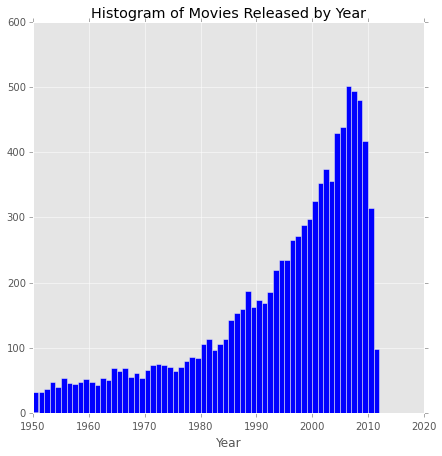

In [68]:
fig = plt.figure(figsize=(7,7))
ax = plt.subplot(111)
ax.hist(data_dna.Year, bins = np.arange(1950, 2013), color='b')
ax.set_title("Histogram of Movies Released by Year")
ax.set_xlabel("Year")

#Exercise:
1. Plot a histogram of the imdb rating for the movies in the dataset
2. plot a histogram of the runtimes for the moveis in the dataset

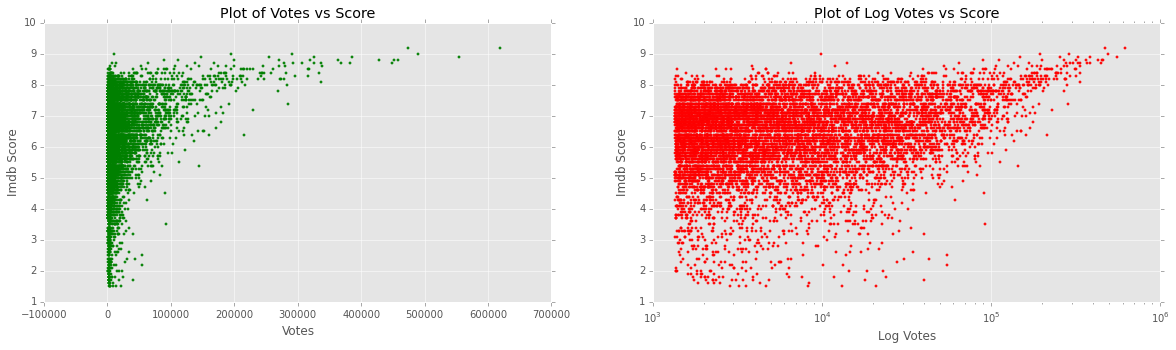

In [69]:
fig = plt.figure(figsize = (20,5))
ax = plt.subplot(121)
ax.scatter(data_dna.Votes, data_dna.Score, color='g',  marker='.')
ax.set_title("Plot of Votes vs Score")
ax.set_xlabel("Votes")
ax.set_ylabel("Imdb Score")

ax1 = plt.subplot(122)
ax1.scatter(data_dna.Votes, data_dna.Score, color='r', marker='.')
ax1.set_xscale('Log')
ax1.set_title("Plot of Log Votes vs Score")
ax1.set_xlabel("Log Votes")
ax1.set_ylabel("Imdb Score")

#Exercise:
1. Plot a scatter plot of Year vs Imdb Score

####The lowest rated movies are:

In [70]:
data_dna[data_dna.Score == data_dna.Score.min()][['Title']]

,Title
1982,Manos: The Hands of Fate
2793,Superbabies: Baby Geniuses 2
3746,Daniel the Wizard
5158,Ben & Arthur
5993,Night Train to Mundo Fine
6257,Monster a-Go Go
6726,Dream Well


#Exercise:
1. Get a list of the highest rated movies

####The most frequent genres:

In [71]:
#sum, by default, sums across a row
fg = pd.DataFrame(data_dna.sum()[7:], columns = ["Genre Count"])
fg

,Genre Count
Action,1891
Adult,9
Adventure,1313
Animation,314
Biography,394
Comedy,3922
Crime,1867
Drama,5697
Family,754
Fantasy,916


####and plot this

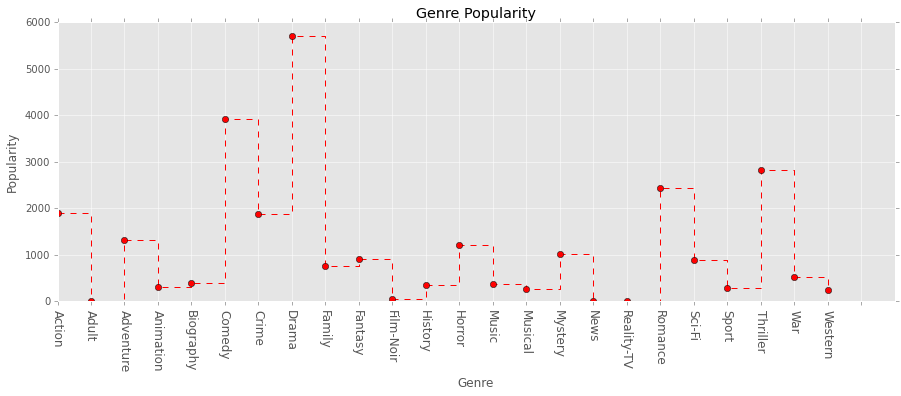

In [72]:
fig = plt.figure(figsize=(15,5))
ax = plt.subplot(111)
ax.plot(fg.values, color='r', linestyle='--', marker='o', drawstyle='steps-post')
ax.set_xticks(np.arange(0,25))
ax.set_xticklabels(fg.index, rotation=-90, fontsize='large')
ax.set_title("Genre Popularity")
ax.set_xlabel("Genre")
ax.set_ylabel("Popularity")

####Finally let's look at grouping
####Group the movies by decade

In [73]:
decade = (data['Year']//10) * 10
print decade

0     1990
1     1990
2     1990
3     1990
4     2010
5     1990
6     1990
7     2000
8     1990
9     1980
10    2000
11    1990
12    1990
13    1990
14    1990
...
9985    1970
9986    1950
9987    1990
9988    1990
9989    1990
9990    2000
9991    1970
9992    2000
9993    2000
9994    1990
9995    2000
9996    2000
9997    1960
9998    1990
9999    2000
Name: Year, Length: 9999, dtype: int64


#Question:
1. What is the python operator //

In [74]:
gdf = data[['Title', 'Year']]
gdf['decade']=decade

/Users/mrgholt/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


In [75]:
####Group by the year and find the highest scoring m

In [76]:
for year, subset in  data_dna.groupby('Year'):
    print year, subset[subset.Score == subset.Score.max()].Title.values

1950 ['Sunset Blvd.']
1951 ['Strangers on a Train']
1952 ["Singin' in the Rain"]
1953 ['The Wages of Fear' 'Tokyo Story']
1954 ['Seven Samurai']
1955 ['Diabolique']
1956 ['The Killing']
1957 ['12 Angry Men']
1958 ['Vertigo']
1959 ['North by Northwest']
1960 ['Psycho']
1961 ['Yojimbo']
1962 ['To Kill a Mockingbird' 'Lawrence of Arabia']
1963 ['The Great Escape' 'High and Low']
1964 ['Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb']
1965 ['For a Few Dollars More']
1966 ['The Good, the Bad and the Ugly']
1967 ['Cool Hand Luke']
1968 ['Once Upon a Time in the West']
1969 ['Butch Cassidy and the Sundance Kid' 'Army of Shadows']
1970 ['Patton' 'The Conformist' 'Le Cercle Rouge']
1971 ['A Clockwork Orange']
1972 ['The Godfather']
1973 ['The Sting' 'Scenes from a Marriage']
1974 ['The Godfather: Part II']
1975 ['Outrageous Class']
1976 ['Tosun Pasa']
1977 ['Star Wars: Episode IV - A New Hope']
1978 ['The Girl with the Red Scarf']
1979 ['Apocalypse Now']
1980 ['Star Wars: 

In [166]:
import operator
title_list = [title.split(' ') for title in data_dna.Title]
#print title_list
#[word_list for word_list in title_list]
word_dict = {}
final_word_list = []
for word_list in title_list:
    #print word_list
    for word in word_list:
        word_dict.setdefault(word, 0)
        word_dict[word] += 1
        final_word_list.append(word)
        
sorted_words = sorted(word_dict.items(), key=operator.itemgetter(1), reverse=True)
sdf = pd.DataFrame(sorted_words, columns=['Word', 'Count'])

s = pd.Series(final_word_list)
print s.describe()
sdf

count     27423
unique     8830
top         The
freq       2139
dtype: object


,Word,Count
0,The,2139
1,of,944
2,the,928
3,and,309
4,in,257
5,A,191
6,to,181
7,a,164
8,Man,147
9,Love,116


In [90]:
new_df = data_dna[['Score', 'Votes']]
print new_df.corr()

         Score    Votes
Score  1.00000  0.26599
Votes  0.26599  1.00000
